Train on 700 samples, validate on 300 samples
Epoch 1/10
700/700 [==============================] - 0s 458us/step - loss: 2.2754 - accuracy: 0.1286 - val_loss: 2.2396 - val_accuracy: 0.1400
Epoch 2/10
700/700 [==============================] - 0s 131us/step - loss: 2.2089 - accuracy: 0.1643 - val_loss: 2.2045 - val_accuracy: 0.1533
Epoch 3/10
700/700 [==============================] - 0s 126us/step - loss: 2.1714 - accuracy: 0.1843 - val_loss: 2.1807 - val_accuracy: 0.1500
Epoch 4/10
700/700 [==============================] - 0s 132us/step - loss: 2.1434 - accuracy: 0.1886 - val_loss: 2.1674 - val_accuracy: 0.1667
Epoch 5/10
700/700 [==============================] - 0s 127us/step - loss: 2.1201 - accuracy: 0.2114 - val_loss: 2.1506 - val_accuracy: 0.1933
Epoch 6/10
700/700 [==============================] - 0s 130us/step - loss: 2.0874 - accuracy: 0.2829 - val_loss: 2.1321 - val_accuracy: 0.2300
Epoch 7/10
700/700 [==============================] - 0s 125us/step - loss: 2.0545 - accur

KeyError: ignored

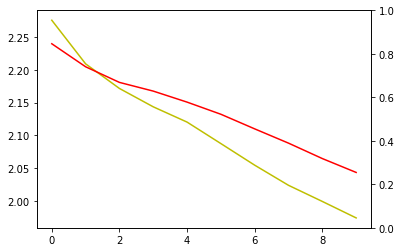

In [5]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=10, batch_size=10, validation_data=(X_val, Y_val))

# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()